In [1]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/Data loader')
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/commands')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from readTrc_4CH import Trc
from tqdm import tqdm
import scipy.signal as sci
from uncertainties import ufloat
from uncertainties import unumpy as unp
from PIL import Image
from cluster_finder import cfinder
import math

df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
pd.set_option("display.max_columns",150)

vthresh = 0.0075
cthresh = 15000
csize = 10
beam_start = 7800
beam_stop = 9050

t_start = 0.00010300054328999163

def ts_from_ms(ms):
    dt = 8.000000106811456e-10
    ms -= t_start
    return round(ms/dt)

def ms_from_ts(ts):
    dt = 8.000000106811456e-10
    return ts*dt+t_start

In [2]:
shape_mat = np.zeros((1040, 1392))
center = [731,533]
rad = 2000

for i in range(len(shape_mat[0])):
    for k in range(len(shape_mat)):
        curr_dis = ((i-center[0])**2 + (k-center[1])**2)**0.5
        if curr_dis < rad:
            shape_mat[k, i] = 1
            
arr_len = np.count_nonzero(shape_mat)

In [3]:
ped_files = ['/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif', '/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif']
#ped_files = ['/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif']
#ped_files = ['/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif']
ped_arr = np.zeros((1040,1392))
ped_std = 0

for i in range(len(ped_files)):
    temp_arr = np.array(Image.open(ped_files[i]))
    ped_arr += temp_arr/len(ped_files)
    ped_std += np.std(temp_arr)/len(ped_files)

ped_arr[shape_mat == 0] = 0
ped_av = math.ceil(np.average(ped_arr[shape_mat == 1]))
#ped_std = np.std(ped_arr[shape_mat == 1])
thresh = ped_av + 3*ped_std

In [4]:
flvm = ['/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720277436.561.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720278818.923.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720279045.708.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720279855.748.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720282155.605.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720282385.994.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720285150.802.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720285841.984.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720286878.770.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720287458.954.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720289298.506.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720289758.810.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720290104.889.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720291486.880.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_06/WF1234.1720293214.848.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720345954.838.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720346188.831.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720351882.872.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720353346.841.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720354502.867.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720357267.721.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720359913.724.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720360377.673.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720360604.920.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720369129.680.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720374313.655.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720376732.806.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720380824.836.trc']

flvb = ['/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720310581.729.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720310700.519.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720312428.557.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720312654.856.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720313810.918.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720321878.490.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720323490.888.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720323724.895.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720324070.971.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720329020.948.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720329135.669.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720332364.887.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_07/WF1234.1720333056.550.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720392283.686.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720395163.712.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720395508.926.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720397812.859.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720398273.668.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720414516.808.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720423122.337.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720433038.000.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720435315.605.trc',
 '/eos/experiment/gbar/pgunpc/data/24_07_08/WF1234.1720435434.410.trc']

In [4]:
tst = '/eos/experiment/gbar/pgunpc/data/24_07_06/PCO-SwY_exp_10_us_1720277202.562.tif'

In [5]:
flcm = [val[:42] + 'PCO-SwY_exp_10_us_' + val[-18:-4] + '.tif' for val in flvm]
flcb = [val[:42] + 'PCO-SwY_exp_10_us_' + val[-18:-4] + '.tif' for val in flvb]

In [17]:
lims = [8080, 8580]
vthresh = 0.0075

pulsesm = []

for i in range(len(flvm)):
    d = Trc().open(flvm[i])[1][2][lims[0]:lims[1]]
    p = sci.find_peaks(d, height = vthresh)
    if len(p[1]['peak_heights'])!=1: print(i, len(p[1]['peak_heights']), p[1]['peak_heights'])
    pulsesm += [max(list(p[1]['peak_heights']))]
    
print()
    
pulsesb = []

for i in range(len(flvb)):
    d = Trc().open(flvb[i])[1][2][lims[0]:lims[1]]
    p = sci.find_peaks(d, height = vthresh)
    if len(p[1]['peak_heights'])!=1: print(i, len(p[1]['peak_heights']), p[1]['peak_heights'])
    pulsesb += [max(list(p[1]['peak_heights']))]


2 2 [0.00810002 0.00830002]
12 2 [0.00810002 0.00750002]

5 2 [0.00810002 0.00990002]


In [20]:
len(flvm), len(pulsesm)

(28, 28)

In [11]:
7.5/1000

0.0075

In [10]:
7.5/1000 == vthresh

False

In [47]:
thresh

0.01

In [21]:
clustersm = [[] for _ in range(len(flcm))]

for i in range(len(flcm)):
    c = cfinder(flcm[i], min_sum = 3000, min_size = 2, corr = ped_av, thresh = thresh-ped_av, shape_mat = shape_mat)
    clustersm[i] = c
    
clustersb = [[] for _ in range(len(flcm))]

for i in range(len(flcb)):
    c = cfinder(flcb[i], min_sum = 3000, min_size = 2, corr = ped_av, thresh = thresh-ped_av, shape_mat = shape_mat)
    clustersb[i] = c
    

In [29]:
for i in range(len(flvm)):
    print(round(pulsesm[i]*1000, 1), max(list(clustersm[i]['sum'])))

33.3 113460
7.9 21592
8.3 21196
8.7 26540
7.7 16192
8.3 17872
15.5 34712
9.3 16608
36.7 116448
48.3 113724
27.1 97504
7.7 19428
8.1 18248
12.5 14144
40.3 87960
7.7 17960
7.9 19772
9.9 17816
8.7 21236
10.5 26660
9.1 25376
7.9 21848
7.9 28164
40.5 129900
39.3 121156
10.3 24308
18.7 57952
8.9 24984


In [28]:
for i in range(len(flvb)):
    print(round(pulsesb[i]*1000, 1), max(list(clustersb[i]['sum'])))

7.9 18060
17.3 52960
11.1 27672
12.3 9284
7.5 17116
9.9 27792
7.5 19596
8.5 20096
9.7 18764
9.7 28356
8.7 23548
13.3 37776
8.7 23048
7.7 20932
8.5 25000
15.5 40032
9.7 16748
7.5 18104
12.1 28028
7.7 8864
9.5 23988
9.1 23544
8.5 21320


In [26]:
33.3, 113460,
7.9 , 21592,
8.3 , 21196,
8.7 , 26540,
7.7 , 16192,
8.3 , 17872,
15.5, 34712,
9.3 , 16608,
36.7, 116448,
48.3, 113724,
27.1, 97504,
7.7 , 19428,
8.1 , 18248,
12.5, 14144,
40.3, 87960,
7.7 , 17960,
7.9 , 19772,
9.9 , 17816,
8.7 , 21236,
10.5, 26660,
9.1 , 25376,
7.9 , 21848,
7.9 , 28164,
40.5, 129900,
39.3, 121156,
10.3, 24308,
18.7, 57952,
8.9   24984

SyntaxError: invalid syntax (887722179.py, line 12)

In [ ]:
7.9 , 18060,
17.3, 52960,
11.1, 27672,
12.3, 9284,
7.5 , 17116,
9.9 , 27792,
7.5 , 19596,
8.5 , 20096,
9.7 , 18764,
9.7 , 28356,
8.7 , 23548,
13.3, 37776,
8.7 , 23048,
7.7 , 20932,
8.5 , 25000,
15.5, 40032,
9.7 , 16748,
7.5 , 18104,
12.1, 28028,
7.7 , 8864,
9.5 , 23988,
9.1 , 23544,
8.5   21320

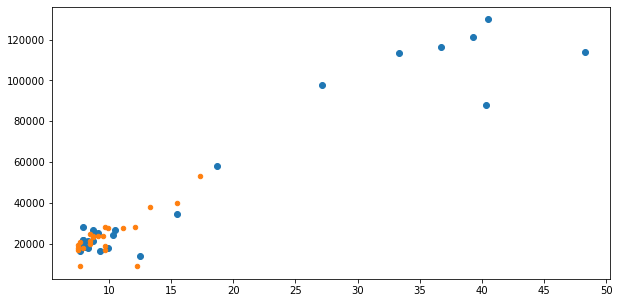

In [32]:
plt.figure(figsize = (10,5))
plt.scatter([33.3,7.9 ,8.3 ,8.7 ,7.7 ,8.3 ,15.5,9.3 ,36.7,48.3,27.1,7.7 ,8.1 ,12.5,40.3,7.7 ,7.9 ,9.9 ,8.7 ,10.5,9.1 ,7.9 ,7.9 ,40.5,39.3,10.3,18.7,8.9  ], [113460,21592,21196,26540,16192,17872,34712,16608,116448,113724,97504,19428,18248,14144,87960,17960,19772,17816,21236,26660,25376,21848,28164,129900,121156,24308,57952,24984])
plt.scatter([7.9 ,17.3,11.1,12.3,7.5 ,9.9 ,7.5 ,8.5 ,9.7 ,9.7 ,8.7 ,13.3,8.7 ,7.7 ,8.5 ,15.5,9.7 ,7.5 ,12.1,7.7 ,9.5 ,9.1 ,8.5  ], [18060,52960,27672,9284,17116,27792,19596,20096,18764,28356,23548,37776,23048,20932,25000,40032,16748,18104,28028,8864,23988,23544,21320], s = 20)

In [34]:
for i in range(len(flvm)):
    print(round(pulsesm[i]*1000, 1), sum(list(clustersm[i]['sum'])))

33.3 126796
7.9 31020
8.3 41104
8.7 30204
7.7 26788
8.3 20900
15.5 60212
9.3 30656
36.7 127228
48.3 138740
27.1 112036
7.7 40832
8.1 40608
12.5 14144
40.3 140892
7.7 21484
7.9 19772
9.9 26068
8.7 41440
10.5 53700
9.1 28508
7.9 27164
7.9 38528
40.5 135628
39.3 121156
10.3 52144
18.7 71324
8.9 45820


In [35]:
for i in range(len(flvb)):
    print(round(pulsesb[i]*1000, 1), sum(list(clustersb[i]['sum'])))

7.9 22984
17.3 74836
11.1 44688
12.3 12760
7.5 26348
9.9 58112
7.5 34412
8.5 24504
9.7 22320
9.7 49624
8.7 57588
13.3 55288
8.7 31992
7.7 28812
8.5 44348
15.5 52544
9.7 25736
7.5 18104
12.1 32916
7.7 13112
9.5 37176
9.1 32368
8.5 25308


In [25]:
33.3, 126796,
7.9 , 31020,
8.3 , 41104,
8.7 , 30204,
7.7 , 26788,
8.3 , 20900,
15.5, 60212,
9.3 , 30656,
36.7, 127228,
48.3, 138740,
27.1, 112036,
7.7 , 40832,
8.1 , 40608,
12.5, 14144,
40.3, 140892,
7.7 , 21484,
7.9 , 19772,
9.9 , 26068,
8.7 , 41440,
10.5, 53700,
9.1 , 28508,
7.9 , 27164,
7.9 , 38528,
40.5, 135628,
39.3, 121156,
10.3, 52144,
18.7, 71324,
8.9   45820

SyntaxError: invalid syntax (3138311839.py, line 1)

In [ ]:
7.9 , 22984,
17.3, 74836,
11.1, 44688,
12.3, 12760,
7.5 , 26348,
9.9 , 58112,
7.5 , 34412,
8.5 , 24504,
9.7 , 22320,
9.7 , 49624,
8.7 , 57588,
13.3, 55288,
8.7 , 31992,
7.7 , 28812,
8.5 , 44348,
15.5, 52544,
9.7 , 25736,
7.5 , 18104,
12.1, 32916,
7.7 , 13112,
9.5 , 37176,
9.1 , 32368,
8.5   25308

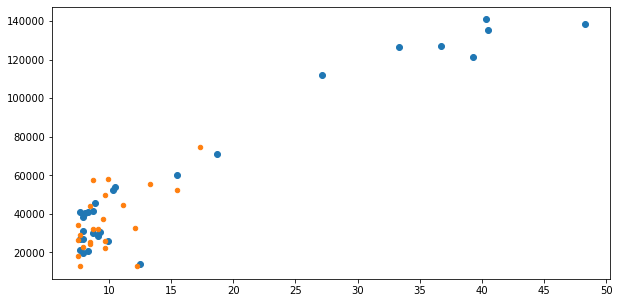

In [37]:
plt.figure(figsize = (10,5))
plt.scatter([33.3,7.9 ,8.3 ,8.7 ,7.7 ,8.3 ,15.5,9.3 ,36.7,48.3,27.1,7.7 ,8.1 ,12.5,40.3,7.7 ,7.9 ,9.9 ,8.7 ,10.5,9.1 ,7.9 ,7.9 ,40.5,39.3,10.3,18.7,8.9  ], [126796,31020,41104,30204,26788,20900,60212,30656,127228,138740,112036,40832,40608,14144,140892,21484,19772,26068,41440,53700,28508,27164,38528,135628,121156,52144,71324,45820])
plt.scatter([7.9 ,17.3,11.1,12.3,7.5 ,9.9 ,7.5 ,8.5 ,9.7 ,9.7 ,8.7 ,13.3,8.7 ,7.7 ,8.5 ,15.5,9.7 ,7.5 ,12.1,7.7 ,9.5 ,9.1 ,8.5  ], [22984,74836,44688,12760,26348,58112,34412,24504,22320,49624,57588,55288,31992,28812,44348,52544,25736,18104,32916,13112,37176,32368,25308], s = 20)

In [36]:
pos = 0

print(pulses[pos])
clusters[pos]

0.03330001828726381


,cluster,xpos,ypos,size,sum,coordinates
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",433,1080,455,113460,"[[0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,..."
1,"[[1984, 0], [8400, 2140], [0, 812]]",920,1205,4,13336,"[[0, 1, 1, 2], [0, 0, 1, 1]]"


In [18]:
len(flvm)

12

In [4]:
print('Number of waveform files with candidates (mixing and background):', len(flvm), ',', len(flvb))
print('Number of image files with candidates (mixing and background):', len(flcm), ',', len(flcb))

Number of waveform files with candidates (mixing and background): 60 , 54
Number of image files with candidates (mixing and background): 56 , 49


In [5]:
shape_mat = np.zeros((1040, 1392))
center = [731,533]
rad = 440

for i in range(len(shape_mat[0])):
    for k in range(len(shape_mat)):
        curr_dis = ((i-center[0])**2 + (k-center[1])**2)**0.5
        if curr_dis < rad:
            shape_mat[k, i] = 1
            
arr_len = np.count_nonzero(shape_mat)

In [6]:
ped_files = ['/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif', '/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif']
#ped_files = ['/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif']
#ped_files = ['/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif']
ped_arr = np.zeros((1040,1392))
ped_std = 0

for i in range(len(ped_files)):
    temp_arr = np.array(Image.open(ped_files[i]))
    ped_arr += temp_arr/len(ped_files)
    ped_std += np.std(temp_arr)/len(ped_files)

ped_arr[shape_mat == 0] = 0
ped_av = math.ceil(np.average(ped_arr[shape_mat == 1]))
#ped_std = np.std(ped_arr[shape_mat == 1])
thresh = ped_av + 3*ped_std

In [8]:
fm_diff = []
fb_diff = []

vm_times = [float(val[-18:-4]) for val in flvm]
vb_times = [float(val[-18:-4]) for val in flvb]

cm_times = [float(val[-18:-4]) for val in flcm]
cb_times = [float(val[-18:-4]) for val in flcb]

for i in range(len(cm_times)):
    if not cm_times[i] in vm_times: fm_diff += [flcm[i]]
        
for i in range(len(cb_times)):
    if not cb_times[i] in vb_times: fb_diff += [flcb[i]]

In [69]:
cfinder(cfile, min_sum = 3000, min_size = 2, corr = ped_av, thresh = thresh-ped_av, shape_mat = shape_mat)

,cluster,xpos,ypos,size,sum,coordinates
0,"[[0, 97, 117, 161, 117, 153, 121, 0, 0], [73, ...",206,938,33,4789,"[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,"[[0, 0, 0, 77, 0, 0, 0, 77], [0, 0, 117, 105, ...",316,695,28,3328,"[[0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,..."


In [93]:
len(fm_diff), len(fb_diff)

(19, 21)

In [113]:
cm

,cluster,xpos,ypos,size,sum,coordinates
0,"[[0, 0, 0, 0, 0, 69, 0, 0, 0, 0, 0, 0], [0, 0,...",562,919,105,20577,"[[0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,..."


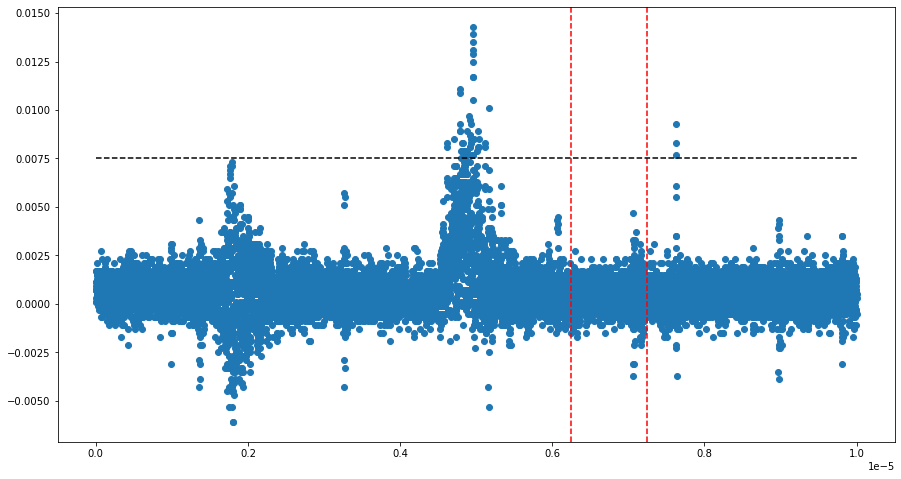

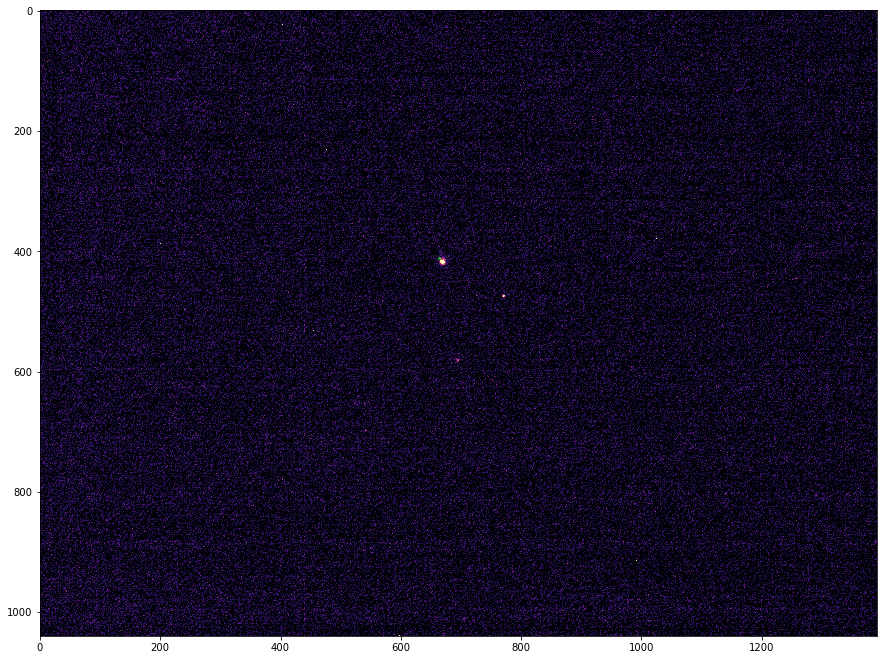

In [119]:
p_diff = 0

cfile = fb_diff[p_diff]
vfile = list(df[df.MCP5 == cfile].Waveform_12bit)[0]

#print(cfile[-18:-4], vfile[-18:-4])

dvm = Trc().open(vfile)

plt.figure(figsize = (15,8))

plt.scatter(dvm[0][2]-t_start, dvm[1][2])
plt.axvline(ms_from_ts(beam_start)-t_start, linestyle = '--', c = 'r')
plt.axvline(ms_from_ts(beam_stop)-t_start, linestyle = '--', c = 'r')
plt.plot([0, 1e-5], [vthresh, vthresh], linestyle = '--', c = 'k')

cfile = list(df[df.Waveform_12bit == vfile].MCP5)[0]

dcm = np.array(Image.open(cfile))
#dcm[shape_mat == 0] = 0

cm = cfinder(cfile, min_sum = cthresh, min_size = csize, corr = ped_av, thresh = thresh-ped_av, shape_mat = shape_mat)

plt.figure(figsize = (15,15))

plt.imshow(dcm, cmap = 'magma', vmin = 800, vmax = 1000, interpolation = 'nearest')
plt.scatter(cm.ypos, cm.xpos, c = 'lime', s = 5, alpha = 0.5)

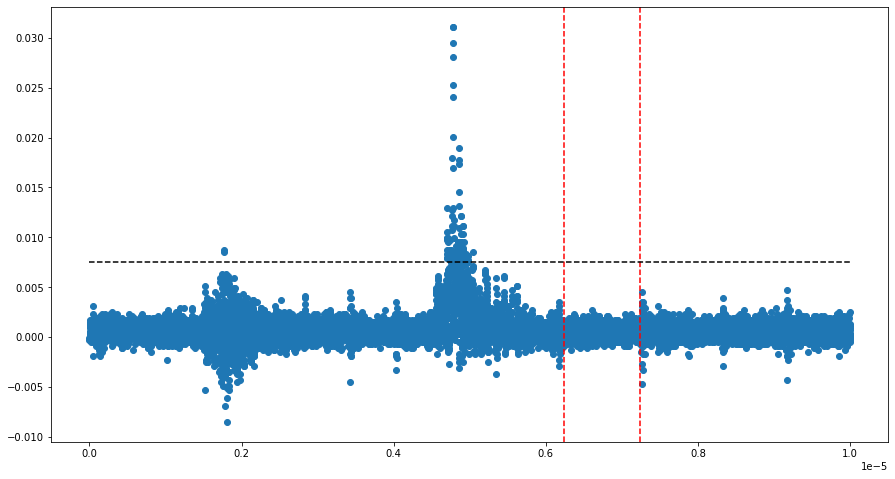

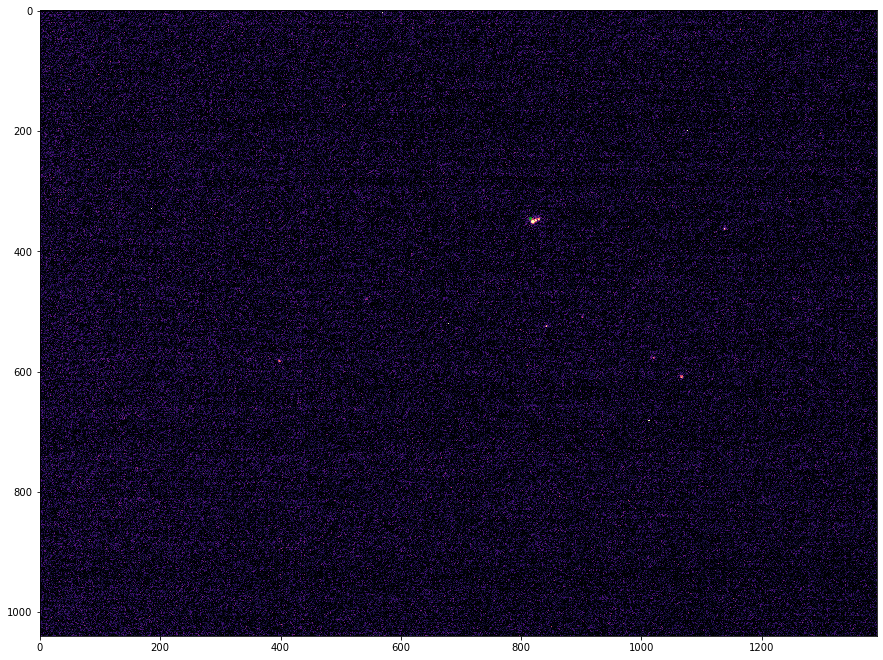

In [118]:
p_diff = 18

cfile = fm_diff[p_diff]
vfile = list(df[df.MCP5 == cfile].Waveform_12bit)[0]

#print(cfile[-18:-4], vfile[-18:-4])

dvm = Trc().open(vfile)

plt.figure(figsize = (15,8))

plt.scatter(dvm[0][2]-t_start, dvm[1][2])
plt.axvline(ms_from_ts(beam_start)-t_start, linestyle = '--', c = 'r')
plt.axvline(ms_from_ts(beam_stop)-t_start, linestyle = '--', c = 'r')
plt.plot([0, 1e-5], [vthresh, vthresh], linestyle = '--', c = 'k')

cfile = list(df[df.Waveform_12bit == vfile].MCP5)[0]

dcm = np.array(Image.open(cfile))
#dcm[shape_mat == 0] = 0

cm = cfinder(cfile, min_sum = cthresh, min_size = csize, corr = ped_av, thresh = thresh-ped_av, shape_mat = shape_mat)

plt.figure(figsize = (15,15))

plt.imshow(dcm, cmap = 'magma', vmin = 800, vmax = 1000, interpolation = 'nearest')
plt.scatter(cm.ypos, cm.xpos, c = 'lime', s = 5, alpha = 0.5)

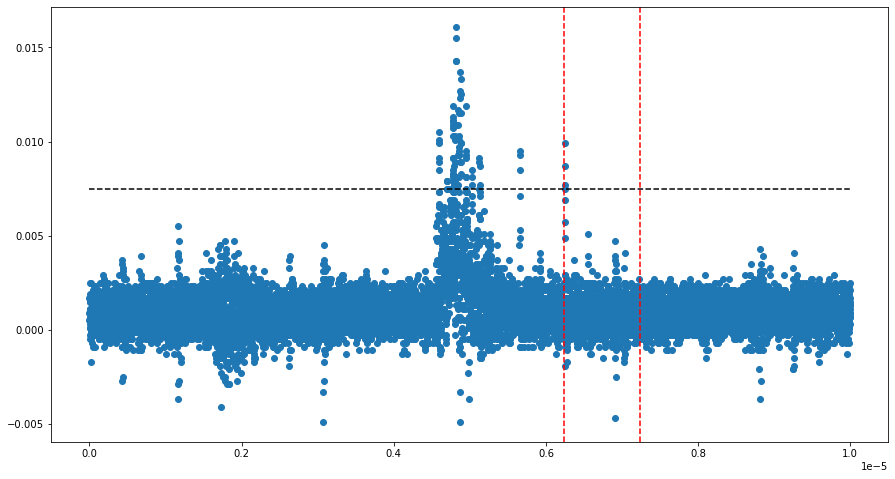

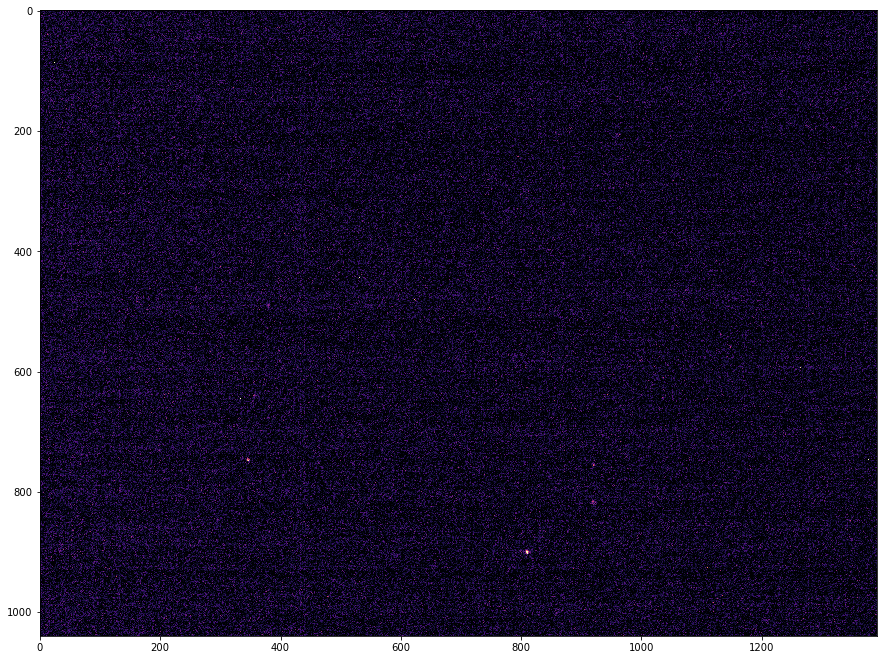

In [73]:
p_diff = 0

vfile = fm_diff[p_diff]
cfile = list(df[df.Waveform_12bit == vfile].MCP5)[0]

dvm = Trc().open(vfile)

plt.figure(figsize = (15,8))

plt.scatter(dvm[0][2]-t_start, dvm[1][2])
plt.axvline(ms_from_ts(beam_start)-t_start, linestyle = '--', c = 'r')
plt.axvline(ms_from_ts(beam_stop)-t_start, linestyle = '--', c = 'r')
plt.plot([0, 1e-5], [vthresh, vthresh], linestyle = '--', c = 'k')

dcm = np.array(Image.open(cfile))
#dcm[shape_mat == 0] = 0

cm = cfinder(cfile, min_sum = cthresh, min_size = csize, corr = ped_av, thresh = thresh-ped_av, shape_mat = shape_mat)

plt.figure(figsize = (15,15))

plt.imshow(dcm, cmap = 'magma', vmin = 800, vmax = 1000, interpolation = 'nearest')
plt.scatter(cm.ypos, cm.xpos, c = 'r', s = 5, alpha = 0.5)

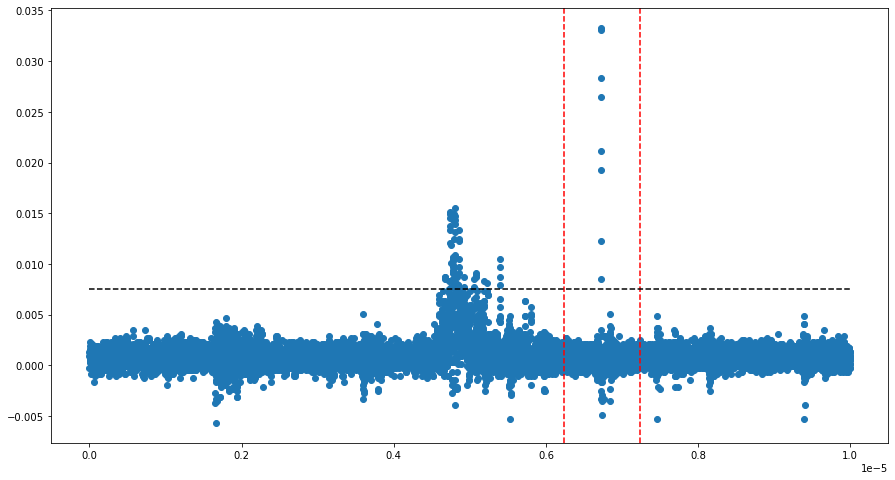

In [22]:
pm = 1

dm = Trc().open(flvm[pm])

plt.figure(figsize = (15,8))

plt.scatter(dm[0][2]-t_start, dm[1][2])
plt.axvline(ms_from_ts(beam_start)-t_start, linestyle = '--', c = 'r')
plt.axvline(ms_from_ts(beam_stop)-t_start, linestyle = '--', c = 'r')
plt.plot([0, 1e-5], [vthresh, vthresh], linestyle = '--', c = 'k')

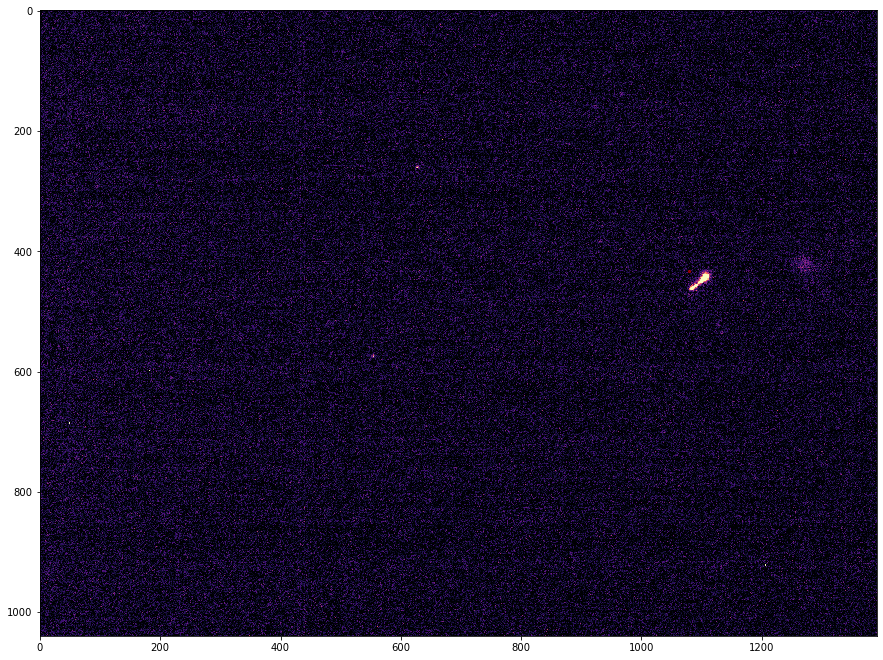

In [21]:
dcm = np.array(Image.open(flcm[pm]))

cm = cfinder(flcm[pm], min_sum = cthresh, min_size = csize, corr = ped_av, thresh = thresh-ped_av, shape_mat = shape_mat)

plt.figure(figsize = (15,15))

plt.imshow(dcm, cmap = 'magma', vmin = 800, vmax = 1000, interpolation = 'nearest')
plt.scatter(cm.ypos, cm.xpos, c = 'r', s = 5, alpha = 0.5)

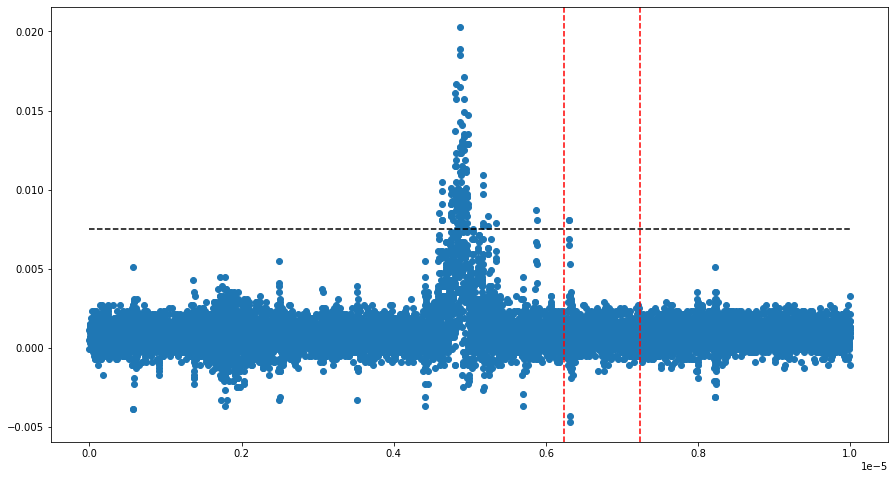

In [14]:
pb = 0

db = Trc().open(flvb[pb])

plt.figure(figsize = (15,8))

plt.scatter(db[0][2]-t_start, db[1][2])
plt.axvline(ms_from_ts(beam_start)-t_start, linestyle = '--', c = 'r')
plt.axvline(ms_from_ts(beam_stop)-t_start, linestyle = '--', c = 'r')
plt.plot([0, 1e-5], [thresh, thresh], linestyle = '--', c = 'k')